---

# Classification. Choose tutors
#### Geekbrains Algorithms for analyze data. Choose proper tutors for math exam

### The evaluation metric is ROC AUC

In this competition your task will be to predict the probability for a tutor to be a proper one for preparing for the math exam. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).

##### Data Description

Id - айди
age - возраст преподавателя
years_of_experience - стаж преподавателя
lesson_price - стоимость урока
qualification - квалификация преподавателя
physics - преподает ли физику
chemistry - преподает ли химию
biology - преподает ли биологию
english - преподает ли английский
geography - преподает ли географию
history - преподает ли историю
mean_exam_points - средний балл за экзамен учеников
choose - целевое значени, выбирать или нет преподавателя

#### Подключение библиотек и скриптов

In [229]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

import warnings
warnings.filterwarnings('ignore')

In [230]:
#Пути к директориям и файлам

# input

TEST_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors/test.csv'
TRAIN_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors/train.csv'

# output

PRED_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-choose-tutors/Macerszmidt_predictionsLog.csv'


#### Загрузка данных

In [231]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [232]:
df.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points',
 'choose']

In [233]:
feature_names = ['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification', 
 'mean_exam_points'
 ]

target_name = 'choose'

In [234]:
df = df[feature_names + [target_name]]
df.head()

,Id,age,years_of_experience,lesson_price,qualification,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,73.0,0


#### Стандартизация признаков

In [235]:
def standard_scale(X_train, X_test):
    X_train_stand = X_train.copy()
    X_test_stand = X_test.copy()
    for i in range(X_train_stand.shape[1]):
        mean = X_train_stand.iloc[:, i].mean()
        std = X_train_stand.iloc[:, i].std()
        X_train_stand.iloc[:, i] = (X_train_stand.iloc[:, i] - mean) / std
        X_test_stand.iloc[:, i] = (X_test_stand.iloc[:, i] - mean) / std
    return X_train_stand, X_test_stand

In [236]:
df_test = pd.read_csv(TEST_PATH)
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [237]:
columns_scaled = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'mean_exam_points'
                ]
df[columns_scaled], df_test[columns_scaled] = standard_scale(df[columns_scaled], df_test[columns_scaled])

#### Разбивка датасета на обучающий и тестовый

In [238]:
X = df.drop(columns=['Id', 'choose'])
y = df['choose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [239]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 5), (3000, 5), (7000,), (3000,))

#### Логистическая регрессия 

In [240]:
def calculation_LogLoss(y, y_pred):
    pred_log = np.where(y_pred == 0, 1e-10, 0.9999999999) 
    error = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return error

def evaluation_model(X, y, iterations, eta=1e-4, log=True):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = 1 / (1 + np.exp(-z))
        error = calculation_LogLoss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0 and log==True:
            print(f'Iteration number: {i}, Weights: {W}, Logloss: {error}')
    return W

In [241]:
coefficients = evaluation_model(X_train, y_train, 500, eta=1)

Iteration number: 0, Weights: age                    0.429351
years_of_experience   -0.181616
lesson_price           0.337785
qualification          1.232497
mean_exam_points      -0.425954
dtype: float64, Logloss: 1.072309914734715
Iteration number: 50, Weights: age                   -0.007583
years_of_experience    0.049632
lesson_price          -0.749759
qualification          0.339133
mean_exam_points       0.422378
dtype: float64, Logloss: 0.6674175256149387
Iteration number: 100, Weights: age                   -0.008611
years_of_experience    0.051396
lesson_price          -0.774502
qualification          0.313450
mean_exam_points       0.473747
dtype: float64, Logloss: 0.6672721779109392
Iteration number: 150, Weights: age                   -0.008660
years_of_experience    0.051460
lesson_price          -0.775416
qualification          0.312038
mean_exam_points       0.476129
dtype: float64, Logloss: 0.6672718655019115
Iteration number: 200, Weights: age                   -0.008

In [242]:
display(X_train, y_train, coefficients)

,age,years_of_experience,lesson_price,qualification,mean_exam_points
2005,0.149322,-1.117674,0.854466,0.345123,0.335770
8298,-0.971436,2.844104,-1.627449,0.345123,-0.473350
5790,-0.224264,0.014262,-0.481950,-0.906684,-0.399793
1969,-0.099735,1.146199,-0.577408,-0.906684,-0.546906
4543,-0.846908,-1.117674,-0.959241,-0.906684,-0.988244
...,...,...,...,...,...
9199,-0.722379,1.712167,-0.291033,-0.906684,-0.032012
296,0.273851,0.014262,1.236299,1.596931,1.218446
9850,0.273851,1.712167,-0.672866,-0.906684,-0.694019
5990,0.896495,-0.551706,-0.291033,-0.906684,-2.312258


2005    0
8298    1
5790    0
1969    0
4543    0
       ..
9199    0
296     0
9850    0
5990    0
5388    0
Name: choose, Length: 7000, dtype: int64

age                   -0.008663
years_of_experience    0.051461
lesson_price          -0.775433
qualification          0.311940
mean_exam_points       0.476247
dtype: float64

In [243]:
def calc_prediction(X, W):
    z = np.dot(X, W)
    y_prediction = 1 / (1 + np.exp(-z))
    return y_prediction

In [244]:
y_train_prediction = calc_prediction(X_train, coefficients)
y_train_prediction

array([0.38845188, 0.78566336, 0.47581012, ..., 0.49853622, 0.23245199,
       0.47211156])

In [245]:
y_test_prediction = calc_prediction(X_test, coefficients)
y_test_prediction

array([0.60212993, 0.56574172, 0.67860062, ..., 0.60161294, 0.36713445,
       0.58477626])

#### ROC AUC

In [246]:
def roc_auc(y_prediction, y_true):
  TPR = []
  FPR = []
  tresholds = np.linspace(0, 1, 20)

  for treshold in tresholds:
    y_pred = np.where(y_prediction >= treshold, 1, 0)

    TP = np.sum((y_true == y_pred) & (y_pred == 1))
    FP = np.sum((y_true != y_pred) & (y_pred == 1))
    TN = np.sum((y_true == y_pred) & (y_pred == 0))
    FN = np.sum((y_true != y_pred) & (y_pred == 0))
    
    tpr = TP / (TP + FN); TPR.append(tpr)
    fpr = FP / (FP + TN); FPR.append(fpr)

  area_under_curve = np.abs(np.trapz(TPR, FPR))
  x = np.linspace(0, 1, 50)
  y = x

  plt.figure(figsize=(6, 4))
  plt.plot(FPR, TPR, linewidth=1.5, color='r')
  plt.plot(x, y, linestyle='--', linewidth=1.5, color='b')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC AUC curve', size=20)

  return f' = {area_under_curve:.4f}'

Train ROC AUC score:  = 0.8228
Test ROC AUC score:  = 0.8184


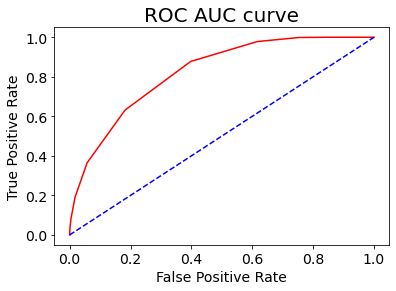

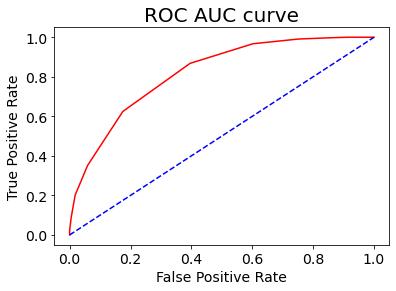

In [247]:
train_roc = roc_auc(y_train_prediction, y_train)
test_roc = roc_auc(y_test_prediction, y_test)

print(f'Train ROC AUC score: {train_roc}',
      f'Test ROC AUC score: {test_roc}', sep='\n')

In [251]:
y_pred_final = calc_prediction(df_test[columns_scaled], coefficients)
y_pred_final = np.where(y_pred>0.5, 1, 0)
y_pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
project_pred_final = pd.DataFrame({'Id': df_test['Id'], 'choose': y_pred_final})
project_pred_final.to_csv(PRED_PATH, index=False, encoding='utf-8', sep=',')

In [255]:
project_pred.describe()

,Id,choose
count,10000.00000,10000.000000
mean,14999.50000,0.003000
std,2886.89568,0.054693
min,10000.00000,0.000000
25%,12499.75000,0.000000
50%,14999.50000,0.000000
75%,17499.25000,0.000000
max,19999.00000,1.000000
